# K-MEANS K-ORTALAMALARI

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
# Veri Seti
# Amerikadaki bazı suç istatistiklerini ifade ediyor.

In [23]:
df = pd.read_csv("./verisetleri/USArrests.csv", index_col = 0)
# index_col = 0 : 0 indexli kolon index olarak kullanmamızı sağlıyor

In [24]:
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [25]:
# Amacımız Amerikanın bu eyaletlerini suç istatistiklerine göre segmentlere-kümelere ayırmak.

In [26]:
# Eskik gözlem olup olmadınının kontrol edelim.
df.isnull().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [27]:
# Bilgilerini kontrol edelim.
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
Murder      50 non-null float64
Assault     50 non-null int64
UrbanPop    50 non-null int64
Rape        50 non-null float64
dtypes: float64(2), int64(2)
memory usage: 4.5+ KB


In [ ]:
# Elli adet gözlem var, dört tane değişken var ve hepsi sayısal değişken.

In [28]:
# Betimsel istatistikleri görelim.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Murder,50.0,7.788,4.355510,0.8,4.075,7.25,11.250,17.4
Assault,50.0,170.760,83.337661,45.0,109.000,159.00,249.000,337.0
UrbanPop,50.0,65.540,14.474763,32.0,54.500,66.00,77.750,91.0
Rape,50.0,21.232,9.366385,7.3,15.075,20.10,26.175,46.0


In [29]:
# Rape- taciz, tecavüz / UrbanPop - bölgenin nüfusu / Assault-saldırı / Murder-saldırı-cinayet

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002CEE3CE5288>,
      dtype=object)

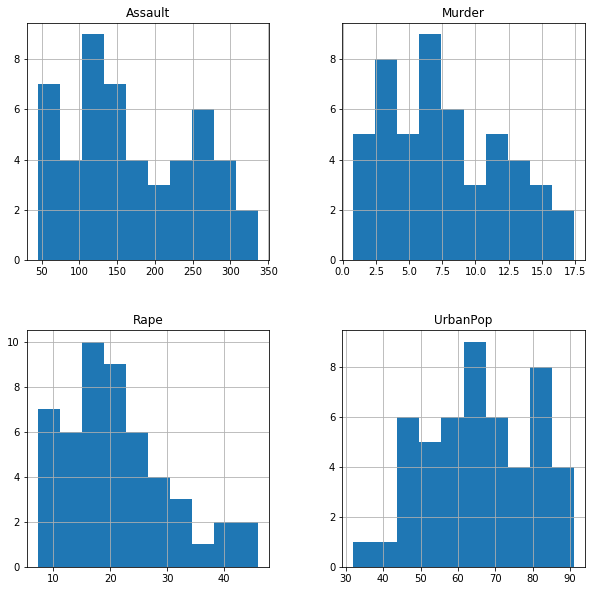

In [30]:
# Dağılımların grafikle gösterilmesi
df.hist(figsize = (10, 10))

In [31]:
# Algoritmanın uygulanması

In [32]:
kmeans = KMeans(n_clusters = 4)

In [34]:
kmeans.get_params()

{'algorithm': 'auto',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 4,
 'n_init': 10,
 'n_jobs': 'deprecated',
 'precompute_distances': 'deprecated',
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

In [35]:
k_fit = kmeans.fit(df)

In [36]:
k_fit.n_clusters

4

In [37]:
k_fit.cluster_centers_ # Oluşan dört küme ve gözlemleri

array([[  2.95      ,  62.7       ,  53.9       ,  11.51      ],
       [ 11.8125    , 272.5625    ,  68.3125    ,  28.375     ],
       [  8.21428571, 173.28571429,  70.64285714,  22.84285714],
       [  5.59      , 112.4       ,  65.6       ,  17.27      ]])

In [38]:
# Gözlemlerin sınıflarını bulma
k_fit.labels_

array([1, 1, 1, 2, 1, 2, 3, 1, 1, 2, 0, 3, 1, 3, 0, 3, 3, 1, 0, 1, 2, 1,
       0, 1, 2, 3, 3, 1, 0, 2, 1, 1, 1, 0, 3, 2, 2, 3, 2, 1, 0, 2, 2, 3,
       0, 2, 2, 0, 0, 2])

In [39]:
# Kümelerin görselleştirimesi, eksenlerde görselleştirilmesi

In [40]:
# İki değişken seçeceğiz ve iki değişken içerisinden iki cluster için bir görselleştirme yapacağız. İki değişken seçmemizin sebebi, hedeflediğimiz şeyin iki eksen üzerinde kümelenmelerini göstermektir. Fakat elimizde dört tane değişken var. Elimizde ikiden fazla değişken varsa ve bunları yine de iki eksen üzerinde görselleştirmek istiyorsak bu durumda önce verisetini temel bileşen analizi ile pca ile iki bileşene indirgememiz ve ondan sonra bu kümeleri görselleştirmemiz gerekmektedir.

In [41]:
k_means = KMeans(n_clusters = 2).fit(df)

In [42]:
kumeler = k_means.labels_

In [43]:
kumeler

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0])

In [ ]:
# iloc : Bağımsız bir şekilde listelere benzer bir şekilde satır yada sütünlardan seçim yapabilmemizi sağlar.
# df.iloc[:,0] --> Bütün satırlar, Sıfırıncı sütün yani birinci değişkeni al

# loc : İndexlere isimlere bağımlı olarak seçme işlemi için kullanılır

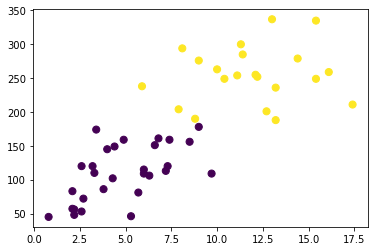

In [45]:
plt.scatter(df.iloc[:,0], df.iloc[0:,1], c = kumeler, s = 50, cmap = "viridis")

In [46]:
# Verisetlerinin merkezlerini işaretlemek için ;

In [47]:
merkezler = k_means.cluster_centers_

In [48]:
merkezler

array([[  4.84137931, 109.75862069,  64.03448276,  16.24827586],
       [ 11.85714286, 255.        ,  67.61904762,  28.11428571]])

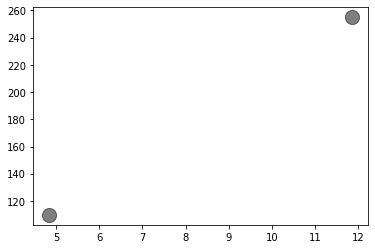

In [49]:
plt.scatter(merkezler[:,0], merkezler[:,1], c = "black", s = 200, alpha = 0.5)

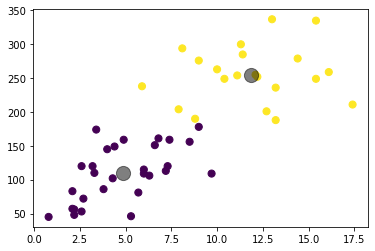

In [50]:
plt.scatter(df.iloc[:,0], df.iloc[0:,1], c = kumeler, s = 50, cmap = "viridis")
plt.scatter(merkezler[:,0], merkezler[:,1], c = "black", s = 200, alpha = 0.5)

In [51]:
# s = 50 : size ı ifade etmektedir. Noktaların büyüklüğüdür.

## OPTİMUM KÜME SAYISININ BELİRLENMESİ

## Elbow Yöntemi

In [52]:
df

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7
Connecticut,3.3,110,77,11.1
Delaware,5.9,238,72,15.8
Florida,15.4,335,80,31.9
Georgia,17.4,211,60,25.8


In [53]:
# ssd : Uzaklık farklarının karelerinin toplamı. 
ssd = []

K = range(1,30)

for k in K:
    kmeans = KMeans(n_clusters = k).fit(df)
    ssd.append(kmeans.inertia_)


Text(0.5, 1.0, 'Optimum Küme Sayısı İçin Elbow Yöntemi')

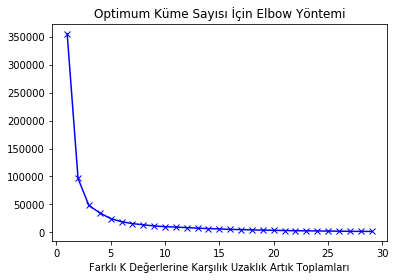

In [54]:
plt.plot(K, ssd, "bx-")
plt.xlabel("Farklı K Değerlerine Karşılık Uzaklık Artık Toplamları")
plt.title("Optimum Küme Sayısı İçin Elbow Yöntemi")

In [55]:
# Burada asıl amacımız dirsek dediğimiz yani kırılımın en sert olduğu noktadan sonraya karar vermek. Grafikte 50000 den sonra eğim düşmeye başlamıştır. Seçilen noktadan önceki kırılmalar toplamı küme sayısı olarak belirlenir. Örnekte 2 eğri kırılımı vardır. 2 ya da 3 olarak seçilebilir.

In [56]:
# ELBOW YÖNTEMİNİN ALTERNATİF OLARAK UYGULANMASI için farklı bir yol

In [57]:
!pip install yellowbrick

In [58]:
from yellowbrick.cluster import KElbowVisualizer

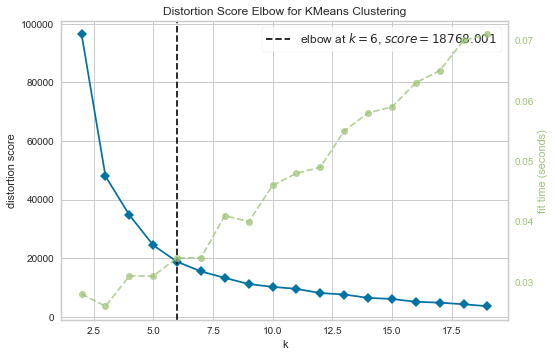

In [59]:
kmeans = KMeans()
visu = KElbowVisualizer(kmeans, k = (2, 20))
visu.fit(df)
visu.poof()

In [60]:
# Öneri olarak 6 küme vermiş.

### FİNAL K-MEANS

In [62]:
kmeans = KMeans(n_clusters = 4).fit(df)
kmeans.get_params()

{'algorithm': 'auto',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 4,
 'n_init': 10,
 'n_jobs': 'deprecated',
 'precompute_distances': 'deprecated',
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

In [63]:
# Kim hangi kümeye ait olduğunu belirlememiz ve küme numaralarını bir araya getirerek dataframe oluşturmamız gerekir

In [66]:
kumeler = kmeans.labels_
kumeler

array([2, 2, 2, 0, 2, 0, 3, 2, 2, 0, 1, 3, 2, 3, 1, 3, 3, 2, 1, 2, 0, 2,
       1, 2, 0, 3, 3, 2, 1, 0, 2, 2, 2, 1, 3, 0, 0, 3, 0, 2, 1, 0, 0, 3,
       1, 0, 0, 1, 1, 0])

In [67]:
pd.DataFrame({"Eyaletler":df.index, "Kumeler": kumeler})

,Eyaletler,Kumeler
0,Alabama,2
1,Alaska,2
2,Arizona,2
3,Arkansas,0
4,California,2
5,Colorado,0
6,Connecticut,3
7,Delaware,2
8,Florida,2
9,Georgia,0


In [68]:
# Bu bilgileri ana veri seti içine ekleme

In [69]:
df["Kume_No"] = kumeler

In [70]:
df

,Murder,Assault,UrbanPop,Rape,Kume_No
Alabama,13.2,236,58,21.2,2
Alaska,10.0,263,48,44.5,2
Arizona,8.1,294,80,31.0,2
Arkansas,8.8,190,50,19.5,0
California,9.0,276,91,40.6,2
Colorado,7.9,204,78,38.7,0
Connecticut,3.3,110,77,11.1,3
Delaware,5.9,238,72,15.8,2
Florida,15.4,335,80,31.9,2
Georgia,17.4,211,60,25.8,0


In [71]:
# Sonuçlar öylece kabul etmek her zaman doğru değildir. Bir insan faktörünün bunları kontrol etmesi değerlendirmesi gerekir.

In [ ]:
# SON